# Шкарбаненко Михаил Б05-907

Задачу 3.4 заменил на 3.2, так как в ней были некорректные переводы (языки перепутаны местами).

## Задача 3 (3.2)

Дана [статистика бросков для игроков NBA](https://github.com/andriygav/PSAD/blob/master/labs/lab1/data/nba.csv)

Выборка представляет собой статистику бросков для различных игроков NBA. Для каждого игрока известны:

* количество успешных бросков в домашних играх (score_home)
* количество бросков в домашних играх (atm_home)
* количество успешных бросков в гостевых играх (score_away)
* количество бросков в гостевых играх (atm_away)

Требуется определить:

1. Есть ли разница в успехе бросков у игроков в домашних и гостевых играх?

2. У какого процента игроков разница в успехе существенна?

## Решение

### Часть 1

In [371]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.descriptivestats import sign_test
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [372]:
data = pd.read_csv('https://raw.githubusercontent.com/andriygav/PSAD/master/labs/lab1/data/nba.csv')
data.sample(5)

,Unnamed: 0,player,team,atm_away,atm_home,score_away,score_home,atm_total,score_total
855,1566,Voskuhl,CHA,53,60,35,42,113,77
806,1482,Teague,ATL,157,197,119,158,354,277
50,114,Balkman,NYK,74,120,44,56,194,100
17,58,Amundson,PHX,142,122,72,57,264,129
544,987,Maggette,CHA,82,126,65,113,208,178


Преобразуем данные. Переведем скоры из абсолютных значений в вероятности успешного броска для домашних и выездных игр.

In [373]:
data['score_prob_away'] = data['score_away'] / data['atm_away']
data['score_prob_home'] = data['score_home'] / data['atm_home']
data.sample(5)

,Unnamed: 0,player,team,atm_away,atm_home,score_away,score_home,atm_total,score_total,score_prob_away,score_prob_home
220,406,Delfino,MIL,109,137,88,106,246,194,0.807339,0.773723
704,1281,Radmanovic,LAL,100,71,81,52,171,133,0.810000,0.732394
246,452,Dudley,PHX,299,324,225,228,623,453,0.752508,0.703704
557,1006,Marks,NOH,26,28,17,19,54,36,0.653846,0.678571
495,898,Kapono,TOR,59,28,50,22,87,72,0.847458,0.785714


Теперь можно применить двухвыборочные критерии для связанных выборок.

In [374]:
x = data['score_prob_away']
y = data['score_prob_home']
print('Критерий Уилкоксона p-value: {}'.format(round(stats.wilcoxon(x, y).pvalue, 3)))
print('Критерий знаков p-value: {}'.format(round(sign_test(x-y)[1], 3)))

Критерий Уилкоксона p-value: 0.091
Критерий знаков p-value: 0.159


array([[<AxesSubplot:title={'center':'score_prob_home'}>,
        <AxesSubplot:title={'center':'score_prob_away'}>]], dtype=object)

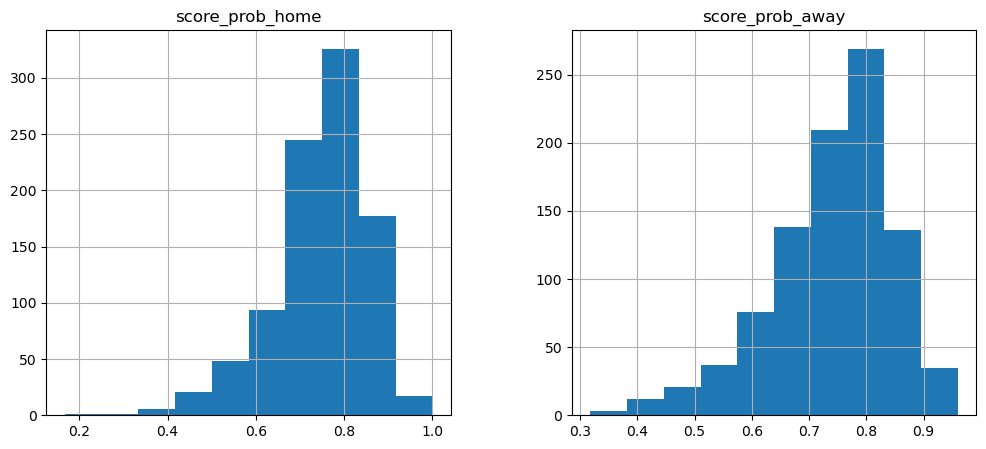

In [375]:
data.hist(column=['score_prob_home', 'score_prob_away'], figsize=(12, 5))

#### Вывод

Cогласно результатм проверки с помощью критериев данные не противоречат гипотезе о том, что разницы в успехе бросков дома и в гостях нет. 

Гистограмы распределений долей успешных бросков также схожи - дополнительное подтверждение того, что данные гипотезе не противоречат.

### Часть 2

Рассмотрим распределние разницы долей успешных бросков в гостевых и домашних матчах.

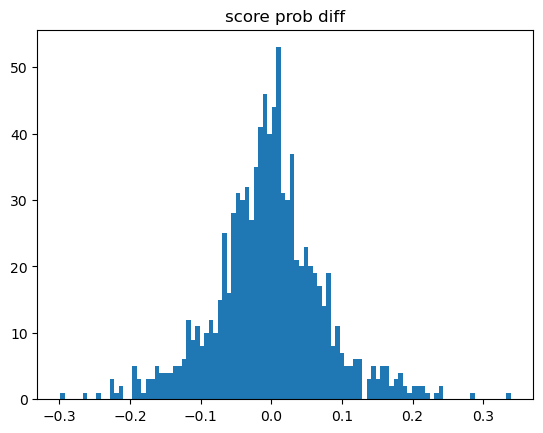

In [376]:
z = x -y
plt.hist(z, bins=100)
plt.title('score prob diff')
plt.show()

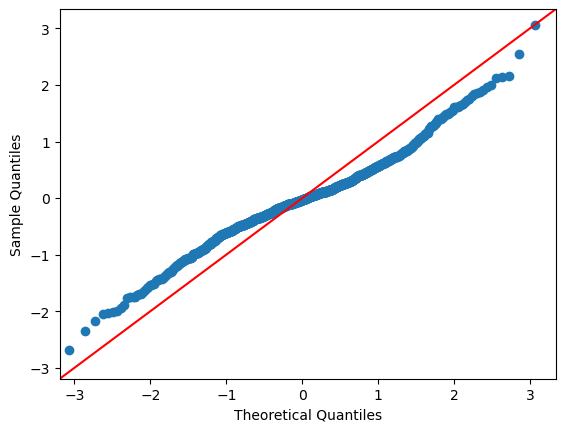

In [377]:
sm.qqplot(9 * z, line='45')
plt.show()

Проверим гипотезу о нормальности данного распределения.

In [378]:
stats.normaltest(z)

NormaltestResult(statistic=33.580186151072404, pvalue=5.1068749860037386e-08)

Гипотеза отклоняется, но распределения явно близко к нормальному. Чтобы определить долю игроков у которых разница в успехе существенна, сначала нужно задать порог, выше которого разница будет считаться существенной. Например: threshold = 0.2.

In [379]:
threshold = 0.2
z_th = z[abs(z) > 0.2]
perc = 100 * len(z_th)/len(z)
print("Доля игроков с существенной разницей: {}%".format(round(perc, 1)))

Доля игроков с существенной разницей: 2.2%
